In [ ]:
#PCA

In [2]:
import pandas as pd
import numpy as np
import pathlib
import glob
import datetime as dt

from statsmodels.tsa.ar_model import AutoReg as AR
from sklearn.metrics import mean_squared_error as mse
import datetime as dt
import warnings

In [43]:
df = pd.read_excel("headline_cpi.xlsx")


In [54]:
#Level 0
level0_df = df[df['display_level']==0][["month","item_name","value"]]
level0_df = level0_df[["month","item_name","value"]].pivot_table(index = "month", columns="item_name",values="value")
cpi_values = level0_df[['All items']]

C:\Users\nguye\AppData\Local\Temp\ipykernel_1868\2065460709.py:76: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)


Chosen Number of Principal Components: 2
Root Mean Squared Error (RMSE): 2.952281732053555


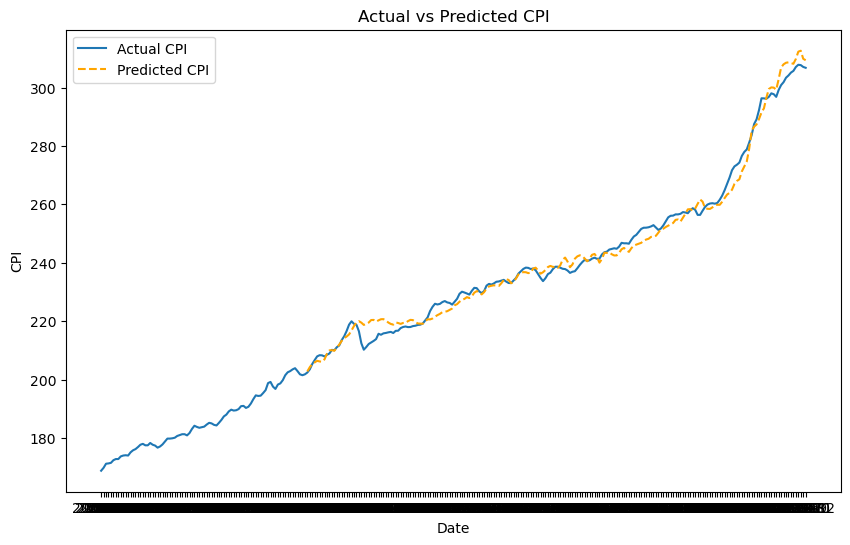

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.pipeline import make_pipeline

def choose_num_components(data, variance_threshold=0.95):
    # Standardize the data
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(data)

    # Apply PCA
    pca = PCA()
    pca.fit(standardized_data)

    # Calculate cumulative explained variance ratio
    explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)

    # Determine the number of components to capture at least 'variance_threshold' of the variance
    num_components = np.argmax(explained_variance_ratio_cumsum >= variance_threshold) + 1

    return num_components

def sliding_window_pca_forecast(X, y, window_size, forecast_horizon, num_components):
    predictions = pd.DataFrame()  # Use a Series with correct index
    
    for i in range(len(X) - window_size - forecast_horizon + 1):
        # Extract the training data for the current window
        train_X = X.iloc[i:i+window_size, :]
        train_y = y.iloc[i:i+window_size]
        
        # Apply PCA for dimensionality reduction on X
        pca = make_pipeline(StandardScaler(), PCA(n_components=num_components))
        pca.fit(train_X)
        reduced_train_X = pca.transform(train_X)
        
        # Fit a linear regression model on the reduced X
        model = LinearRegression()
        model.fit(reduced_train_X, train_y)
        
        # Forecast the next 'forecast_horizon' months
        forecast_X = X.iloc[i+window_size:i+window_size+forecast_horizon, :]
        
        # Apply PCA to forecast X
        reduced_forecast_X = pca.transform(forecast_X)
        
        # Predict the values using the linear regression model
        forecast_predictions = model.predict(reduced_forecast_X)
        
        # Append the predictions to the result Series
        forecast_dates = y.index[i+window_size:i+window_size+forecast_horizon]
        predictions = pd.concat([predictions,forecast_predictions])
    
    return predictions


cpi = level0_df[["All items"]]
cpi_indicators = level0_df[[ 'Apparel', 'Education and communication',
       'Food and beverages', 'Housing', 'Medical care',
       'Other goods and services', 'Recreation']]

window_size = 7 * 12  # 7 years of monthly data
forecast_horizon = 12  # 12 months forecast

# Choose the number of principal components
num_components = choose_num_components(cpi_indicators)

# Perform sliding window forecast using PCA
# predicted_values = sliding_window_pca_forecast(cpi_indicators, cpi, window_size, forecast_horizon, num_components)
X = cpi_indicators
y=cpi
predictions = pd.Series(index=y.index)
for i in range(len(X) - window_size - forecast_horizon + 1):
        # Extract the training data for the current window
        train_X = X.iloc[i:i+window_size, :]
        train_y = y.iloc[i:i+window_size]
        
        # Apply PCA for dimensionality reduction on X
        pca = make_pipeline(StandardScaler(), PCA(n_components=num_components))
        pca.fit(train_X)
        reduced_train_X = pca.transform(train_X)
        
        # Fit a linear regression model on the reduced X
        model = LinearRegression()
        model.fit(reduced_train_X, train_y)
        
        # Forecast the next 'forecast_horizon' months
        forecast_X = X.iloc[i+window_size:i+window_size+forecast_horizon, :]
        
        # Apply PCA to forecast X
        reduced_forecast_X = pca.transform(forecast_X)
        
        # Predict the values using the linear regression model
        forecast_predictions = model.predict(reduced_forecast_X)
        
         # Append the predictions to the result Series
        forecast_dates = y.index[i+window_size:i+window_size+forecast_horizon]
        predictions.loc[forecast_dates] = forecast_predictions.flatten()  # Flatten the array for proper assignment


# Calculate RMSE
rmse = sqrt(mean_squared_error(cpi.iloc[85:], predictions.iloc[85:]))

# Print the chosen number of components and RMSE
print("Chosen Number of Principal Components:", num_components)
print("Root Mean Squared Error (RMSE):", rmse)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(cpi.index, cpi, label='Actual CPI')
plt.plot(predictions.index, predictions, label='Predicted CPI', linestyle='dashed', color='orange')
plt.title('Actual vs Predicted CPI')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.legend()
plt.show()

In [72]:
#Level 1
level1_df = df[df['display_level']==1][["month","item_name","value"]]
level1_df = level1_df[["month","item_name","value"]].pivot_table(index = "month", columns="item_name",values="value")
level1_df = level1_df.fillna(0)

C:\Users\nguye\AppData\Local\Temp\ipykernel_1868\2879490139.py:14: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)


Chosen Number of Principal Components: 4
Root Mean Squared Error (RMSE): 1.0207656948598933


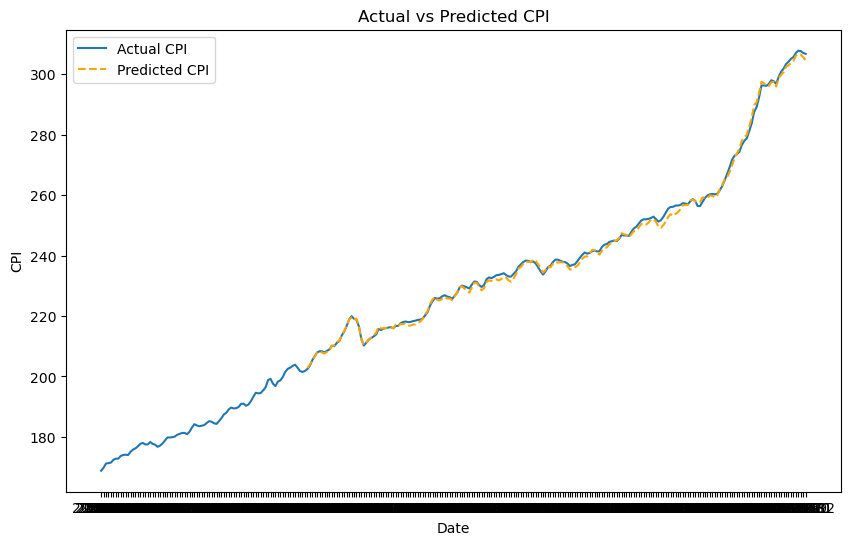

In [74]:
cpi = level0_df[["All items"]]
cpi_indicators = level1_df[level1_df.columns]

window_size = 7 * 12  # 7 years of monthly data
forecast_horizon = 12  # 12 months forecast

# Choose the number of principal components
num_components = choose_num_components(cpi_indicators)

# Perform sliding window forecast using PCA
# predicted_values = sliding_window_pca_forecast(cpi_indicators, cpi, window_size, forecast_horizon, num_components)
X = cpi_indicators
y=cpi
predictions = pd.Series(index=y.index)
for i in range(len(X) - window_size - forecast_horizon + 1):
        # Extract the training data for the current window
        train_X = X.iloc[i:i+window_size, :]
        train_y = y.iloc[i:i+window_size]
        
        # Apply PCA for dimensionality reduction on X
        pca = make_pipeline(StandardScaler(), PCA(n_components=num_components))
        pca.fit(train_X)
        reduced_train_X = pca.transform(train_X)
        
        # Fit a linear regression model on the reduced X
        model = LinearRegression()
        model.fit(reduced_train_X, train_y)
        
        # Forecast the next 'forecast_horizon' months
        forecast_X = X.iloc[i+window_size:i+window_size+forecast_horizon, :]
        
        # Apply PCA to forecast X
        reduced_forecast_X = pca.transform(forecast_X)
        
        # Predict the values using the linear regression model
        forecast_predictions = model.predict(reduced_forecast_X)
        
         # Append the predictions to the result Series
        forecast_dates = y.index[i+window_size:i+window_size+forecast_horizon]
        predictions.loc[forecast_dates] = forecast_predictions.flatten()  # Flatten the array for proper assignment


# Calculate RMSE
rmse = sqrt(mean_squared_error(cpi.iloc[85:], predictions.iloc[85:]))

# Print the chosen number of components and RMSE
print("Chosen Number of Principal Components:", num_components)
print("Root Mean Squared Error (RMSE):", rmse)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(cpi.index, cpi, label='Actual CPI')
plt.plot(predictions.index, predictions, label='Predicted CPI', linestyle='dashed', color='orange')
plt.title('Actual vs Predicted CPI')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.legend()
plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_1868\1194954529.py:18: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)


Chosen Number of Principal Components: 2
Root Mean Squared Error (RMSE): 2.8558392806760673


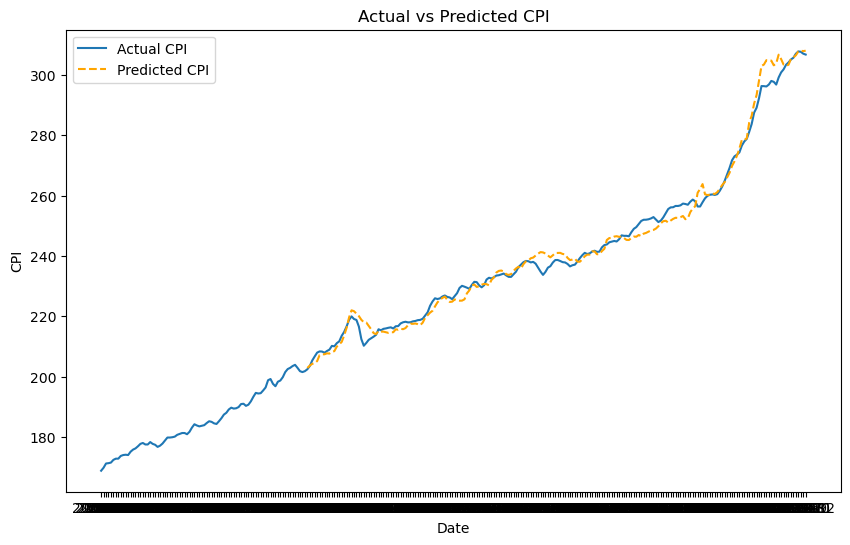

In [75]:
#Level 2
level2_df = df[df['display_level']==2][["month","item_name","value"]]
level2_df = level2_df[["month","item_name","value"]].pivot_table(index = "month", columns="item_name",values="value")
level2_df = level2_df.fillna(0)

cpi_indicators = level2_df[level2_df.columns]

window_size = 7 * 12  # 7 years of monthly data
forecast_horizon = 12  # 12 months forecast

# Choose the number of principal components
num_components = choose_num_components(cpi_indicators)

# Perform sliding window forecast using PCA
# predicted_values = sliding_window_pca_forecast(cpi_indicators, cpi, window_size, forecast_horizon, num_components)
X = cpi_indicators
y=cpi
predictions = pd.Series(index=y.index)
for i in range(len(X) - window_size - forecast_horizon + 1):
        # Extract the training data for the current window
        train_X = X.iloc[i:i+window_size, :]
        train_y = y.iloc[i:i+window_size]
        
        # Apply PCA for dimensionality reduction on X
        pca = make_pipeline(StandardScaler(), PCA(n_components=num_components))
        pca.fit(train_X)
        reduced_train_X = pca.transform(train_X)
        
        # Fit a linear regression model on the reduced X
        model = LinearRegression()
        model.fit(reduced_train_X, train_y)
        
        # Forecast the next 'forecast_horizon' months
        forecast_X = X.iloc[i+window_size:i+window_size+forecast_horizon, :]
        
        # Apply PCA to forecast X
        reduced_forecast_X = pca.transform(forecast_X)
        
        # Predict the values using the linear regression model
        forecast_predictions = model.predict(reduced_forecast_X)
        
         # Append the predictions to the result Series
        forecast_dates = y.index[i+window_size:i+window_size+forecast_horizon]
        predictions.loc[forecast_dates] = forecast_predictions.flatten()  # Flatten the array for proper assignment


# Calculate RMSE
rmse = sqrt(mean_squared_error(cpi.iloc[85:], predictions.iloc[85:]))

# Print the chosen number of components and RMSE
print("Chosen Number of Principal Components:", num_components)
print("Root Mean Squared Error (RMSE):", rmse)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(cpi.index, cpi, label='Actual CPI')
plt.plot(predictions.index, predictions, label='Predicted CPI', linestyle='dashed', color='orange')
plt.title('Actual vs Predicted CPI')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.legend()
plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_1868\4049471012.py:18: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)


Chosen Number of Principal Components: 1
Root Mean Squared Error (RMSE): 5.5865822225316


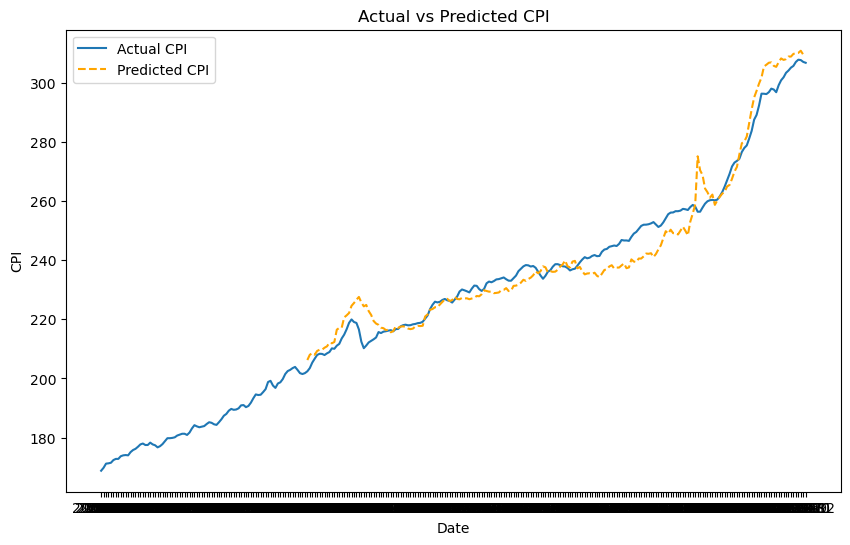

In [81]:
#Level 1
level3_df = df[df['display_level']==3][["month","item_name","value"]]
level3_df = level3_df[["month","item_name","value"]].pivot_table(index = "month", columns="item_name",values="value")
level3_df = level3_df.fillna(0)

cpi_indicators = level3_df[level3_df.columns]

window_size = 7 * 12  # 7 years of monthly data
forecast_horizon = 12  # 12 months forecast

# Choose the number of principal components
num_components = choose_num_components(cpi_indicators)

# Perform sliding window forecast using PCA
# predicted_values = sliding_window_pca_forecast(cpi_indicators, cpi, window_size, forecast_horizon, num_components)
X = cpi_indicators
y=cpi
predictions = pd.Series(index=y.index)
for i in range(len(X) - window_size - forecast_horizon + 1):
        # Extract the training data for the current window
        train_X = X.iloc[i:i+window_size, :]
        train_y = y.iloc[i:i+window_size]
        
        # Apply PCA for dimensionality reduction on X
        pca = make_pipeline(StandardScaler(), PCA(n_components=num_components))
        pca.fit(train_X)
        reduced_train_X = pca.transform(train_X)
        
        # Fit a linear regression model on the reduced X
        model = LinearRegression()
        model.fit(reduced_train_X, train_y)
        
        # Forecast the next 'forecast_horizon' months
        forecast_X = X.iloc[i+window_size:i+window_size+forecast_horizon, :]
        
        # Apply PCA to forecast X
        reduced_forecast_X = pca.transform(forecast_X)
        
        # Predict the values using the linear regression model
        forecast_predictions = model.predict(reduced_forecast_X)
        
         # Append the predictions to the result Series
        forecast_dates = y.index[i+window_size:i+window_size+forecast_horizon]
        predictions.loc[forecast_dates] = forecast_predictions.flatten()  # Flatten the array for proper assignment


# Calculate RMSE
rmse = sqrt(mean_squared_error(cpi.iloc[85:], predictions.iloc[85:]))

# Print the chosen number of components and RMSE
print("Chosen Number of Principal Components:", num_components)
print("Root Mean Squared Error (RMSE):", rmse)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(cpi.index, cpi, label='Actual CPI')
plt.plot(predictions.index, predictions, label='Predicted CPI', linestyle='dashed', color='orange')
plt.title('Actual vs Predicted CPI')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.legend()
plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_1868\4142732488.py:18: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)


Chosen Number of Principal Components: 1
Root Mean Squared Error (RMSE): 5.537460825656851


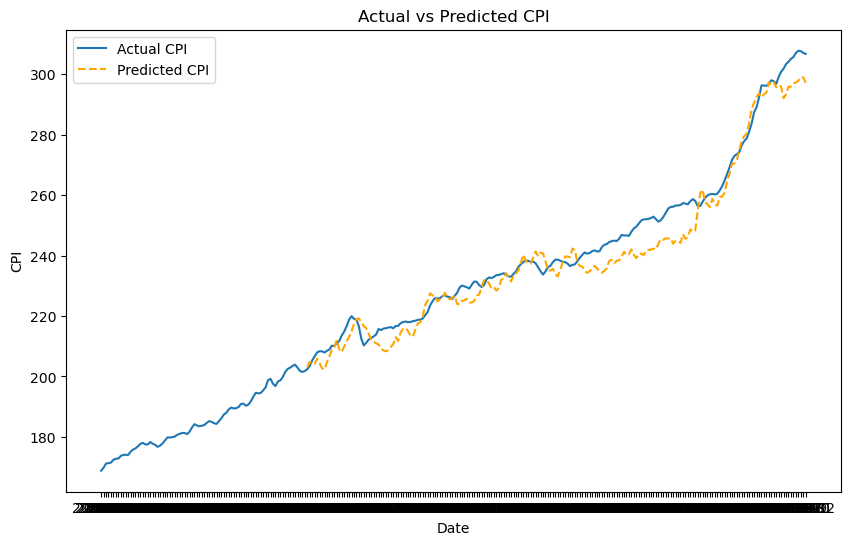

In [80]:
#Level 1
level4_df = df[df['display_level']==4][["month","item_name","value"]]
level4_df = level4_df[["month","item_name","value"]].pivot_table(index = "month", columns="item_name",values="value")
level4_df = level4_df.fillna(0)

cpi_indicators = level4_df[level4_df.columns]

window_size = 7 * 12  # 7 years of monthly data
forecast_horizon = 12  # 12 months forecast

# Choose the number of principal components
num_components = choose_num_components(cpi_indicators)

# Perform sliding window forecast using PCA
# predicted_values = sliding_window_pca_forecast(cpi_indicators, cpi, window_size, forecast_horizon, num_components)
X = cpi_indicators
y=cpi
predictions = pd.Series(index=y.index)
for i in range(len(X) - window_size - forecast_horizon + 1):
        # Extract the training data for the current window
        train_X = X.iloc[i:i+window_size, :]
        train_y = y.iloc[i:i+window_size]
        
        # Apply PCA for dimensionality reduction on X
        pca = make_pipeline(StandardScaler(), PCA(n_components=num_components))
        pca.fit(train_X)
        reduced_train_X = pca.transform(train_X)
        
        # Fit a linear regression model on the reduced X
        model = LinearRegression()
        model.fit(reduced_train_X, train_y)
        
        # Forecast the next 'forecast_horizon' months
        forecast_X = X.iloc[i+window_size:i+window_size+forecast_horizon, :]
        
        # Apply PCA to forecast X
        reduced_forecast_X = pca.transform(forecast_X)
        
        # Predict the values using the linear regression model
        forecast_predictions = model.predict(reduced_forecast_X)
        
         # Append the predictions to the result Series
        forecast_dates = y.index[i+window_size:i+window_size+forecast_horizon]
        predictions.loc[forecast_dates] = forecast_predictions.flatten()  # Flatten the array for proper assignment


# Calculate RMSE
rmse = sqrt(mean_squared_error(cpi.iloc[85:], predictions.iloc[85:]))

# Print the chosen number of components and RMSE
print("Chosen Number of Principal Components:", num_components)
print("Root Mean Squared Error (RMSE):", rmse)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(cpi.index, cpi, label='Actual CPI')
plt.plot(predictions.index, predictions, label='Predicted CPI', linestyle='dashed', color='orange')
plt.title('Actual vs Predicted CPI')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.legend()
plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_1868\3510997343.py:18: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)


Chosen Number of Principal Components: 1
Root Mean Squared Error (RMSE): 8.355910648773472


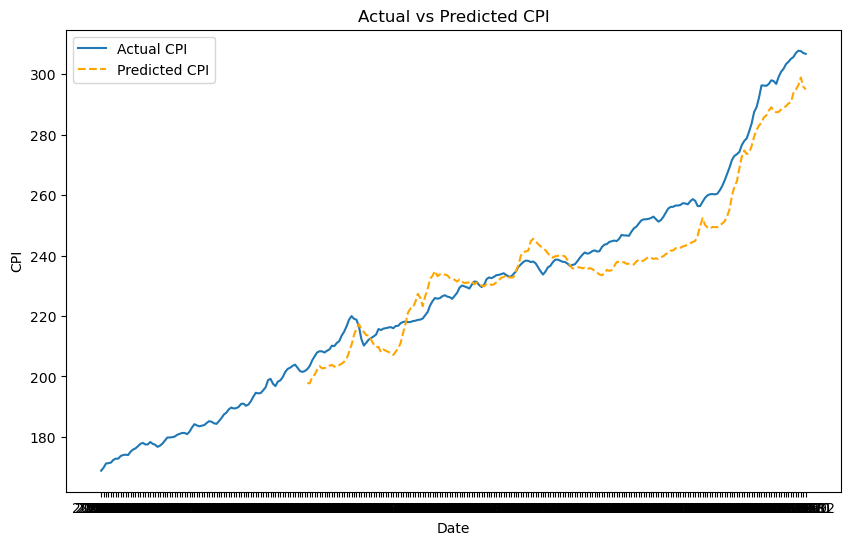

In [78]:
#Level 1
level5_df = df[df['display_level']==5][["month","item_name","value"]]
level5_df = level5_df[["month","item_name","value"]].pivot_table(index = "month", columns="item_name",values="value")
level5_df = level5_df.fillna(0)

cpi_indicators = level5_df[level5_df.columns]

window_size = 7 * 12  # 7 years of monthly data
forecast_horizon = 12  # 12 months forecast

# Choose the number of principal components
num_components = choose_num_components(cpi_indicators)

# Perform sliding window forecast using PCA
# predicted_values = sliding_window_pca_forecast(cpi_indicators, cpi, window_size, forecast_horizon, num_components)
X = cpi_indicators
y=cpi
predictions = pd.Series(index=y.index)
for i in range(len(X) - window_size - forecast_horizon + 1):
        # Extract the training data for the current window
        train_X = X.iloc[i:i+window_size, :]
        train_y = y.iloc[i:i+window_size]
        
        # Apply PCA for dimensionality reduction on X
        pca = make_pipeline(StandardScaler(), PCA(n_components=num_components))
        pca.fit(train_X)
        reduced_train_X = pca.transform(train_X)
        
        # Fit a linear regression model on the reduced X
        model = LinearRegression()
        model.fit(reduced_train_X, train_y)
        
        # Forecast the next 'forecast_horizon' months
        forecast_X = X.iloc[i+window_size:i+window_size+forecast_horizon, :]
        
        # Apply PCA to forecast X
        reduced_forecast_X = pca.transform(forecast_X)
        
        # Predict the values using the linear regression model
        forecast_predictions = model.predict(reduced_forecast_X)
        
         # Append the predictions to the result Series
        forecast_dates = y.index[i+window_size:i+window_size+forecast_horizon]
        predictions.loc[forecast_dates] = forecast_predictions.flatten()  # Flatten the array for proper assignment


# Calculate RMSE
rmse = sqrt(mean_squared_error(cpi.iloc[85:], predictions.iloc[85:]))

# Print the chosen number of components and RMSE
print("Chosen Number of Principal Components:", num_components)
print("Root Mean Squared Error (RMSE):", rmse)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(cpi.index, cpi, label='Actual CPI')
plt.plot(predictions.index, predictions, label='Predicted CPI', linestyle='dashed', color='orange')
plt.title('Actual vs Predicted CPI')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.legend()
plt.show()